In [1]:
import anndata as ad
import scanpy.api as sc
import episcanpy.api as epi
import numpy as np
import copy
import scipy
import pandas as pd

/home/icb/chaichoompu/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=400)

In [3]:
DATADIR="/home/icb/chaichoompu/Group/workspace/Benchmarking_data_integration/data/brain_atac_3datasets"

# Load dataset #1: 10x data

In [23]:
adata_1st = ad.read(DATADIR+"/atac_v1_adult_brain_fresh_5k_sparse_bin_min500bins_min100cells_nb2.h5ad")

In [25]:
adata_1st.obs_names

Index(['AGCGATAGACTATTCATTATTGACCGAGTATAGCCT',
       'AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT',
       'AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC',
       'AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG',
       'AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA',
       'AGCGATAGATACCTCGACCGCCTCTTATTATAGCCT',
       'AGCGATAGATACCTCGACGCGATTGCAGGTACTGAC',
       'AGCGATAGATACCTCGACGTTGGATCTTGTACTGAC',
       'AGCGATAGATACCTCGACTGCCAGTTGCAGGCGAAG',
       'AGCGATAGATACCTCGACTGCCAGTTGCCAGGACGT',
       ...
       'TCTCGCGCTTCGAATATTGTTGGATCTTGTACTGAC',
       'TCTCGCGCTTCGAATATTTGCCAGTTGCAGGCGAAG',
       'TCTCGCGCTTCGAATATTTGCCAGTTGCCCTATCCT',
       'TCTCGCGCTTCGAATATTTGCCAGTTGCGGCTCTGA',
       'TCTCGCGCTTGCTTAGATGAGACCTACCAGGCGAAG',
       'TCTCGCGCTTGCTTAGATGAGACCTACCTATAGCCT',
       'TCTCGCGCTTGCTTAGATGTCTGCAATCCCTATCCT',
       'TCTCGCGCTTGCTTAGATGTCTGCAATCTATAGCCT',
       'TCTCGCGCTTGCTTAGATGTTGGATCTTAGGCGAAG',
       'TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC'],
      dtype='object', name='index', length=3386)

In [5]:
adata_1st

AnnData object with n_obs × n_vars = 3386 × 222007 
    var: 'keep', 'n_cells'

In [6]:
np.max(adata_1st.X)

27.0

In [7]:
if np.max(adata_1st.X) > 1:
    epi.pp.binarize(adata_1st)

np.max(adata_1st.X)

1.0

In [8]:
adata_1st.var_names

Index(['chr1_3105000_3110000', 'chr1_3110000_3115000', 'chr1_3185000_3190000',
       'chr1_3190000_3195000', 'chr1_3195000_3200000', 'chr1_3200000_3205000',
       'chr1_3205000_3210000', 'chr1_3210000_3215000', 'chr1_3215000_3220000',
       'chr1_3235000_3240000',
       ...
       'chrX_166265000_166270000', 'chrX_166315000_166320000',
       'chrX_166360000_166365000', 'chrX_166365000_166370000',
       'chrX_166410000_166415000', 'chrX_166415000_166420000',
       'chrY_345000_350000', 'chrY_450000_455000', 'chrY_580000_585000',
       'chrY_620000_625000'],
      dtype='object', name='index', length=222007)

In [9]:
new_name = adata_1st.var_names.str.replace('00_','01_',regex=False)
adata_1st.var_names=new_name
adata_1st.var_names

Index(['chr1_3105001_3110000', 'chr1_3110001_3115000', 'chr1_3185001_3190000',
       'chr1_3190001_3195000', 'chr1_3195001_3200000', 'chr1_3200001_3205000',
       'chr1_3205001_3210000', 'chr1_3210001_3215000', 'chr1_3215001_3220000',
       'chr1_3235001_3240000',
       ...
       'chrX_166265001_166270000', 'chrX_166315001_166320000',
       'chrX_166360001_166365000', 'chrX_166365001_166370000',
       'chrX_166410001_166415000', 'chrX_166415001_166420000',
       'chrY_345001_350000', 'chrY_450001_455000', 'chrY_580001_585000',
       'chrY_620001_625000'],
      dtype='object', name='index', length=222007)

# Load dataset #2: Fang et al 2019 data

In [10]:
adata_2nd = ad.read(DATADIR+"/CEMBA180312_3B_sparse_bin.h5ad")

In [11]:
adata_2nd

AnnData object with n_obs × n_vars = 14930 × 545118 

In [12]:
np.max(adata_2nd.X)

1.0

In [13]:
if np.max(adata_2nd.X) > 1:
    epi.pp.binarize(adata_2nd)

np.max(adata_2nd.X)

1.0

In [14]:
adata_2nd.var_names

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '545108', '545109', '545110', '545111', '545112', '545113', '545114',
       '545115', '545116', '545117'],
      dtype='object', name='index', length=545118)

In [15]:
# To remind, there are the other files or cells as well
#CEMBA180308_3B_sparse_bin.h5ad
#CEMBA180306_2B_sparse_bin.h5ad
#CEMBA180305_2B_sparse_peak.h5ad
#CEMBA180227_1A_sparse_bin.h5ad
#CEMBA180226_1A_sparse_bin.h5ad

In [16]:
with open(DATADIR+"/CEMBA180312_3B_5kbin.txt") as f:
    bin_fang = f.readlines()
bin_fang = bin_fang[1:]
bin_fang = [n[:-1].split(' * ')[-1] for n in bin_fang]
adata_2nd.var_names = bin_fang

In [17]:
adata_2nd.var_names

Index(['chrY:1-5000', 'chrY:5001-10000', 'chrY:10001-15000',
       'chrY:15001-20000', 'chrY:20001-25000', 'chrY:25001-30000',
       'chrY:30001-35000', 'chrY:35001-40000', 'chrY:40001-45000',
       'chrY:45001-50000',
       ...
       'chr8:129355001-129360000', 'chr8:129360001-129365000',
       'chr8:129365001-129370000', 'chr8:129370001-129375000',
       'chr8:129375001-129380000', 'chr8:129380001-129385000',
       'chr8:129385001-129390000', 'chr8:129390001-129395000',
       'chr8:129395001-129400000', 'chr8:129400001-129405000'],
      dtype='object', length=545118)

In [18]:
new_name = adata_2nd.var_names.str.replace(':','_',regex=False)
new_name2 = new_name.str.replace('-','_',regex=False)
adata_2nd.var_names=new_name2
adata_2nd.var_names

Index(['chrY_1_5000', 'chrY_5001_10000', 'chrY_10001_15000',
       'chrY_15001_20000', 'chrY_20001_25000', 'chrY_25001_30000',
       'chrY_30001_35000', 'chrY_35001_40000', 'chrY_40001_45000',
       'chrY_45001_50000',
       ...
       'chr8_129355001_129360000', 'chr8_129360001_129365000',
       'chr8_129365001_129370000', 'chr8_129370001_129375000',
       'chr8_129375001_129380000', 'chr8_129380001_129385000',
       'chr8_129385001_129390000', 'chr8_129390001_129395000',
       'chr8_129395001_129400000', 'chr8_129400001_129405000'],
      dtype='object', length=545118)

# Load dataset #3: GSM3034638

In [26]:
adata_3rd = ad.read(DATADIR+"/GSM3034638_WholeBrainA_62816_5kbwindowmatrix_mm10.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [27]:
adata_3rd.obs_names

Index(['AGCGATAGACTATTCATTATTGACCGAGTATAGCCT',
       'AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT',
       'AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC',
       'AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG',
       'AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA',
       'AGCGATAGATACCTCGACCGCCTCTTATTATAGCCT',
       'AGCGATAGATACCTCGACGCGATTGCAGGTACTGAC',
       'AGCGATAGATACCTCGACGTTGGATCTTGTACTGAC',
       'AGCGATAGATACCTCGACTGCCAGTTGCAGGCGAAG',
       'AGCGATAGATACCTCGACTGCCAGTTGCCAGGACGT',
       ...
       'TCTCGCGCTTCGAATATTGTTGGATCTTGTACTGAC',
       'TCTCGCGCTTCGAATATTTGCCAGTTGCAGGCGAAG',
       'TCTCGCGCTTCGAATATTTGCCAGTTGCCCTATCCT',
       'TCTCGCGCTTCGAATATTTGCCAGTTGCGGCTCTGA',
       'TCTCGCGCTTGCTTAGATGAGACCTACCAGGCGAAG',
       'TCTCGCGCTTGCTTAGATGAGACCTACCTATAGCCT',
       'TCTCGCGCTTGCTTAGATGTCTGCAATCCCTATCCT',
       'TCTCGCGCTTGCTTAGATGTCTGCAATCTATAGCCT',
       'TCTCGCGCTTGCTTAGATGTTGGATCTTAGGCGAAG',
       'TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC'],
      dtype='object', name='index', length=3386)

In [29]:
set(adata_3rd.obs_names == adata_1st.obs_names)


{True}

In [20]:
adata_3rd

AnnData object with n_obs × n_vars = 3386 × 349834 
    var: 'first_filtering', 'second_filtering', 'n_cells'

In [21]:
np.max(adata_3rd.X)

27.0

In [22]:
if np.max(adata_3rd.X) > 1:
    epi.pp.binarize(adata_3rd)

np.max(adata_3rd.X)

1.0

In [23]:
adata_3rd.var_names

Index(['chr1_3010000_3015000', 'chr1_3015000_3020000', 'chr1_3020000_3025000',
       'chr1_3025000_3030000', 'chr1_3030000_3035000', 'chr1_3035000_3040000',
       'chr1_3040000_3045000', 'chr1_3045000_3050000', 'chr1_3050000_3055000',
       'chr1_3055000_3060000',
       ...
       'chrY_4165000_4170000', 'chrY_4175000_4180000', 'chrY_4230000_4235000',
       'chrY_4225000_4230000', 'chrY_4220000_4225000', 'chrY_4210000_4215000',
       'chrY_4200000_4205000', 'chrY_4195000_4200000', 'chrY_4190000_4195000',
       'chrY_4185000_4190000'],
      dtype='object', name='index', length=349834)

In [24]:
adata_3rd_new_name = adata_3rd.var_names.str.replace('00_','01_',regex=False)
adata_3rd_new_name
adata_3rd.var_names=adata_3rd_new_name
adata_3rd.var_names

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Index(['chr1_3010001_3015000', 'chr1_3015001_3020000', 'chr1_3020001_3025000',
       'chr1_3025001_3030000', 'chr1_3030001_3035000', 'chr1_3035001_3040000',
       'chr1_3040001_3045000', 'chr1_3045001_3050000', 'chr1_3050001_3055000',
       'chr1_3055001_3060000',
       ...
       'chrY_4165001_4170000', 'chrY_4175001_4180000', 'chrY_4230001_4235000',
       'chrY_4225001_4230000', 'chrY_4220001_4225000', 'chrY_4210001_4215000',
       'chrY_4200001_4205000', 'chrY_4195001_4200000', 'chrY_4190001_4195000',
       'chrY_4185001_4190000'],
      dtype='object', name='index', length=349834)

The variable names of adata_3rd and adata are not matched, need to change from, for example, 'chrY:90735001-90740000' to 'chrY_90735001_90740000'

In [25]:
#adata.var_names

In [26]:
#new_name = adata.var_names.str.replace(':','_',regex=False)
#new_name2 = new_name.str.replace('-','_',regex=False)
#adata.var_names=new_name2
#adata.var_names

# Filter only mathed variables

In [ ]:
keep = []
bin_10x = adata_1st.var_names.tolist()
for n2 in bin_fang:
    if n2 in bin_10x:
        keep.append('keep')
    else:
        keep.append('discard')
        
adata_2nd.var['overlap10x'] = keep
adata_2nd = adata_2nd[:,adata_2nd.var['overlap10x']=='keep']
adata_2nd

In [32]:
print(adata_1st.var_names.size)
print(adata_2nd.var_names.size)
print(adata_3rd.var_names.size)

222007
545118
349834


In [33]:
var_names_1_2 = adata_1st.var_names.intersection(adata_2nd.var_names)
print(var_names_1_2.size)

220648


In [34]:
var_names_1_2_3 = var_names_1_2.intersection(adata_3rd.var_names)
print(var_names_1_2_3.size)

152639


In [59]:
keep = np.repeat(0, adata_1st.var_names.size)
in_set = adata_1st.var_names.isin(var_names_1_2_3)
for i in range(in_set.size):
    if in_set[i] == True:
        keep[i] = 1

adata_1st.var['overlap_3datasets'] = keep
adata_1st

AnnData object with n_obs × n_vars = 3386 × 222007 
    var: 'keep', 'n_cells', 'overlap_3datasets'

In [60]:
adata_1st_overlap = copy.copy(adata_1st)
adata_1st_overlap = adata_1st_overlap[:,adata_1st_overlap.var['overlap_3datasets']==1]
adata_1st_overlap

View of AnnData object with n_obs × n_vars = 3386 × 152639 
    var: 'keep', 'n_cells', 'overlap_3datasets'

In [57]:
keep = np.repeat(0, adata_2nd.var_names.size)
in_set = adata_2nd.var_names.isin(var_names_1_2_3)
for i in range(in_set.size):
    if in_set[i] == True:
        keep[i] = 1

adata_2nd.var['overlap_3datasets'] = keep
adata_2nd

AnnData object with n_obs × n_vars = 14930 × 545118 
    var: 'overlap_3datasets'

In [61]:
adata_2nd_overlap = copy.copy(adata_2nd)
adata_2nd_overlap = adata_2nd_overlap[:,adata_2nd_overlap.var['overlap_3datasets']==1]
adata_2nd_overlap

View of AnnData object with n_obs × n_vars = 14930 × 152639 
    var: 'overlap_3datasets'

In [58]:
keep = np.repeat(0, adata_3rd.var_names.size)
in_set = adata_3rd.var_names.isin(var_names_1_2_3)
for i in range(in_set.size):
    if in_set[i] == True:
        keep[i] = 1

adata_3rd.var['overlap_3datasets'] = keep
adata_3rd

AnnData object with n_obs × n_vars = 3386 × 349834 
    var: 'first_filtering', 'second_filtering', 'n_cells', 'overlap_3datasets'

In [62]:
adata_3rd_overlap = copy.copy(adata_3rd)
adata_3rd_overlap = adata_3rd_overlap[:,adata_3rd_overlap.var['overlap_3datasets']==1]
adata_3rd_overlap

View of AnnData object with n_obs × n_vars = 3386 × 152639 
    var: 'first_filtering', 'second_filtering', 'n_cells', 'overlap_3datasets'

In [73]:
# to varify theat all variables are unique
print(adata_1st_overlap.var_names.unique)
print(adata_2nd_overlap.var_names.unique)
print(adata_3rd_overlap.var_names.unique)

<bound method Index.unique of Index(['chr1_3105001_3110000', 'chr1_3110001_3115000', 'chr1_3185001_3190000',
       'chr1_3190001_3195000', 'chr1_3195001_3200000', 'chr1_3200001_3205000',
       'chr1_3205001_3210000', 'chr1_3210001_3215000', 'chr1_3215001_3220000',
       'chr1_3235001_3240000',
       ...
       'chrX_165075001_165080000', 'chrX_165095001_165100000',
       'chrX_165705001_165710000', 'chrX_165735001_165740000',
       'chrX_165755001_165760000', 'chrX_166235001_166240000',
       'chrX_166265001_166270000', 'chrX_166315001_166320000',
       'chrX_166365001_166370000', 'chrX_166415001_166420000'],
      dtype='object', name='index', length=152639)>
<bound method Index.unique of Index(['chrX_5625001_5630000', 'chrX_5665001_5670000', 'chrX_5745001_5750000',
       'chrX_5835001_5840000', 'chrX_5975001_5980000', 'chrX_6895001_6900000',
       'chrX_6995001_7000000', 'chrX_7145001_7150000', 'chrX_7185001_7190000',
       'chrX_7215001_7220000',
       ...
       'chr8_1

In [78]:
# uncomment this line to save the data
#adata_1st_overlap.write(DATADIR+"/overlapped_wt_3datasets_10x.h5ad")
#adata_2nd_overlap.write(DATADIR+"/overlapped_wt_3datasets_CEMBA180312_3B.h5ad")
#adata_3rd_overlap.write(DATADIR+"/overlapped_wt_3datasets_GSM3034638.h5ad")

# Concatenate all datasets

## The 1st and 2nd datasets

In [4]:
# uncomment this line to save the data
adata_1st_overlap = sc.read(DATADIR+"/overlapped_wt_3datasets_10x.h5ad")
adata_2nd_overlap = sc.read(DATADIR+"/overlapped_wt_3datasets_CEMBA180312_3B.h5ad")
adata_3rd_overlap = sc.read(DATADIR+"/overlapped_wt_3datasets_GSM3034638.h5ad")

In [5]:
adata_merge_1_2 = adata_1st_overlap.concatenate(adata_2nd_overlap)

In [6]:
adata_merge_1_2

AnnData object with n_obs × n_vars = 18316 × 152639 
    obs: 'batch'
    var: 'keep-0', 'n_cells-0', 'overlap_3datasets'

## To Add the label of batches for the 1st and 2nd datasets

In [7]:
batchname=copy.copy(adata_merge_1_2.obs['batch'])
batchname

AGCGATAGACTATTCATTATTGACCGAGTATAGCCT-0    0
AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT-0    0
AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC-0    0
AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG-0    0
AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA-0    0
                                         ..
14925-1                                   1
14926-1                                   1
14927-1                                   1
14928-1                                   1
14929-1                                   1
Name: batch, Length: 18316, dtype: category
Categories (2, object): [0, 1]

In [8]:
batchname = batchname.map({ '1' : 'Fang et al. 2019', '0' : '10x Genomics' })
batchname

AGCGATAGACTATTCATTATTGACCGAGTATAGCCT-0        10x Genomics
AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT-0        10x Genomics
AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC-0        10x Genomics
AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG-0        10x Genomics
AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA-0        10x Genomics
                                                ...       
14925-1                                   Fang et al. 2019
14926-1                                   Fang et al. 2019
14927-1                                   Fang et al. 2019
14928-1                                   Fang et al. 2019
14929-1                                   Fang et al. 2019
Name: batch, Length: 18316, dtype: category
Categories (2, object): [10x Genomics, Fang et al. 2019]

In [9]:
adata_merge_1_2.obs['batchname'] = batchname
adata_merge_1_2

AnnData object with n_obs × n_vars = 18316 × 152639 
    obs: 'batch', 'batchname'
    var: 'keep-0', 'n_cells-0', 'overlap_3datasets'

In [84]:
# uncomment this line to save the data
#adata.write(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged.h5ad")

## concatenate the 1st-2nd dataset and the 3rd dataset

In [90]:
# uncomment this line to read the data
#adata = sc.read(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged.h5ad")
#adata

In [10]:
adata_merge_all = adata_merge_1_2.concatenate(adata_3rd_overlap)

In [11]:
adata_merge_all

AnnData object with n_obs × n_vars = 21702 × 152639 
    obs: 'batch', 'batchname'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1'

## To Add the label of the batches to 3 datasets

In [12]:
adata_merge_all.obs['batchname']

AGCGATAGACTATTCATTATTGACCGAGTATAGCCT-0-0    10x Genomics
AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT-0-0    10x Genomics
AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC-0-0    10x Genomics
AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG-0-0    10x Genomics
AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA-0-0    10x Genomics
                                                ...     
TCTCGCGCTTGCTTAGATGAGACCTACCTATAGCCT-1               NaN
TCTCGCGCTTGCTTAGATGTCTGCAATCCCTATCCT-1               NaN
TCTCGCGCTTGCTTAGATGTCTGCAATCTATAGCCT-1               NaN
TCTCGCGCTTGCTTAGATGTTGGATCTTAGGCGAAG-1               NaN
TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC-1               NaN
Name: batchname, Length: 21702, dtype: object

In [14]:
new_batch = adata_merge_all.obs['batchname'].replace(np.nan, 'GSM3034638', regex=False)
new_batch

AGCGATAGACTATTCATTATTGACCGAGTATAGCCT-0-0    10x Genomics
AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT-0-0    10x Genomics
AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC-0-0    10x Genomics
AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG-0-0    10x Genomics
AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA-0-0    10x Genomics
                                                ...     
TCTCGCGCTTGCTTAGATGAGACCTACCTATAGCCT-1        GSM3034638
TCTCGCGCTTGCTTAGATGTCTGCAATCCCTATCCT-1        GSM3034638
TCTCGCGCTTGCTTAGATGTCTGCAATCTATAGCCT-1        GSM3034638
TCTCGCGCTTGCTTAGATGTTGGATCTTAGGCGAAG-1        GSM3034638
TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC-1        GSM3034638
Name: batchname, Length: 21702, dtype: object

In [15]:
adata_merge_all.obs['batchname'] = new_batch
adata_merge_all.obs['batchname']

AGCGATAGACTATTCATTATTGACCGAGTATAGCCT-0-0    10x Genomics
AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT-0-0    10x Genomics
AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC-0-0    10x Genomics
AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG-0-0    10x Genomics
AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA-0-0    10x Genomics
                                                ...     
TCTCGCGCTTGCTTAGATGAGACCTACCTATAGCCT-1        GSM3034638
TCTCGCGCTTGCTTAGATGTCTGCAATCCCTATCCT-1        GSM3034638
TCTCGCGCTTGCTTAGATGTCTGCAATCTATAGCCT-1        GSM3034638
TCTCGCGCTTGCTTAGATGTTGGATCTTAGGCGAAG-1        GSM3034638
TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC-1        GSM3034638
Name: batchname, Length: 21702, dtype: object

In [16]:
# uncomment this line to save the data
#adata_merge_all.write(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged.h5ad")

... storing 'batchname' as categorical
... storing 'keep-0-0' as categorical
... storing 'first_filtering-1' as categorical


# QC for merged datasets

In [20]:
# read the intermediate files 
adata_merge_all = sc.read(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged.h5ad")
adata_merge_all

AnnData object with n_obs × n_vars = 21702 × 152639 
    obs: 'batch', 'batchname'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1'

In [77]:
# Don't run it
#epi.pp.binarize(adata)
#np.max(adata.X)

In [86]:
#sc.pp.filter_cells(adata_merge_all, min_genes=10)

In [40]:
print(adata_merge_all.var_names.size)
print(adata_merge_all.obs_names.size)
filter_min_cells = adata_merge_all.obs_names.size * 0.01
filter_min_vars = adata_merge_all.var_names.size * 0.01
filter_max_cells = adata_merge_all.obs_names.size * 0.99
filter_max_vars = adata_merge_all.var_names.size * 0.99
print(filter_min_vars)
print(filter_max_vars)
print(filter_min_cells)
print(filter_max_cells)

152639
21702
1526.39
151112.61
217.02
21484.98


In [42]:
sc.pp.filter_genes(adata_merge_all, min_cells=filter_min_cells)
sc.pp.filter_genes(adata_merge_all, max_cells=filter_max_cells)
adata_merge_all

AnnData object with n_obs × n_vars = 21702 × 125449 
    obs: 'batch', 'batchname'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'

In [43]:
sc.pp.filter_cells(adata_merge_all, min_genes=filter_min_vars)
sc.pp.filter_cells(adata_merge_all, max_genes=filter_max_vars)
adata_merge_all

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'

In [44]:
#sc.pp.filter_genes(adata_merge_all, min_cells=100)

In [45]:
#adata_merge_all

In [46]:
sc.tl.pca(adata_merge_all)
sc.pp.neighbors(adata_merge_all)
sc.tl.tsne(adata_merge_all)
sc.tl.umap(adata_merge_all)

The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../../home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^



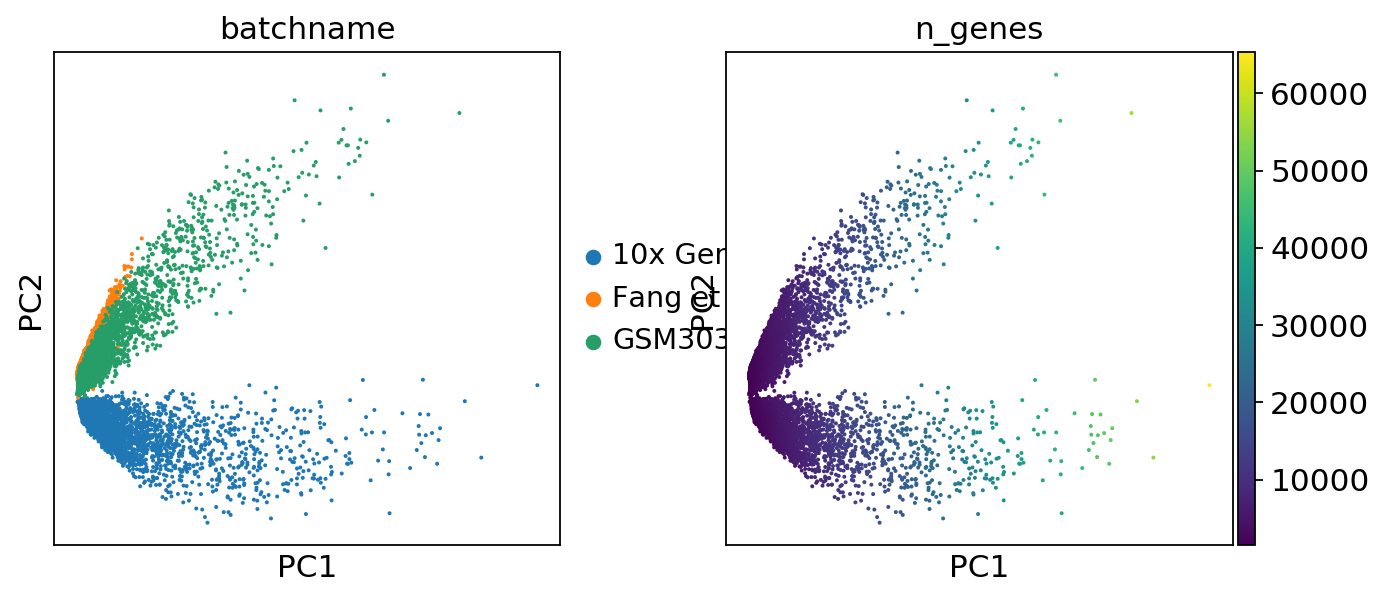

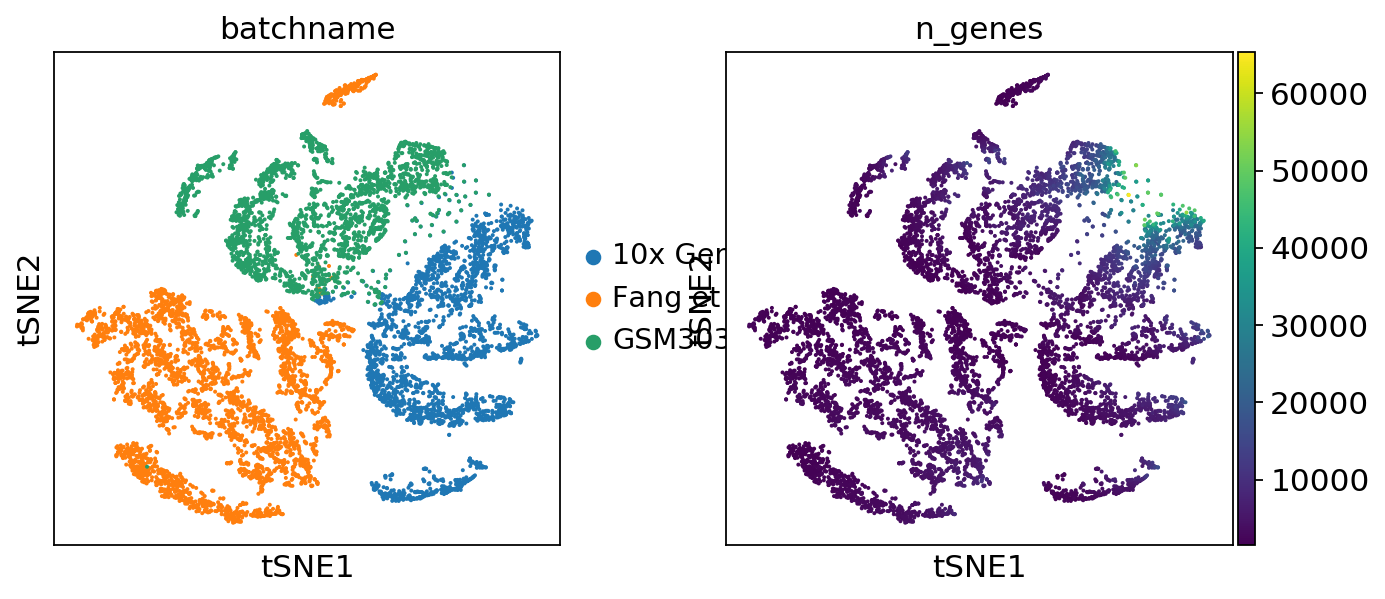

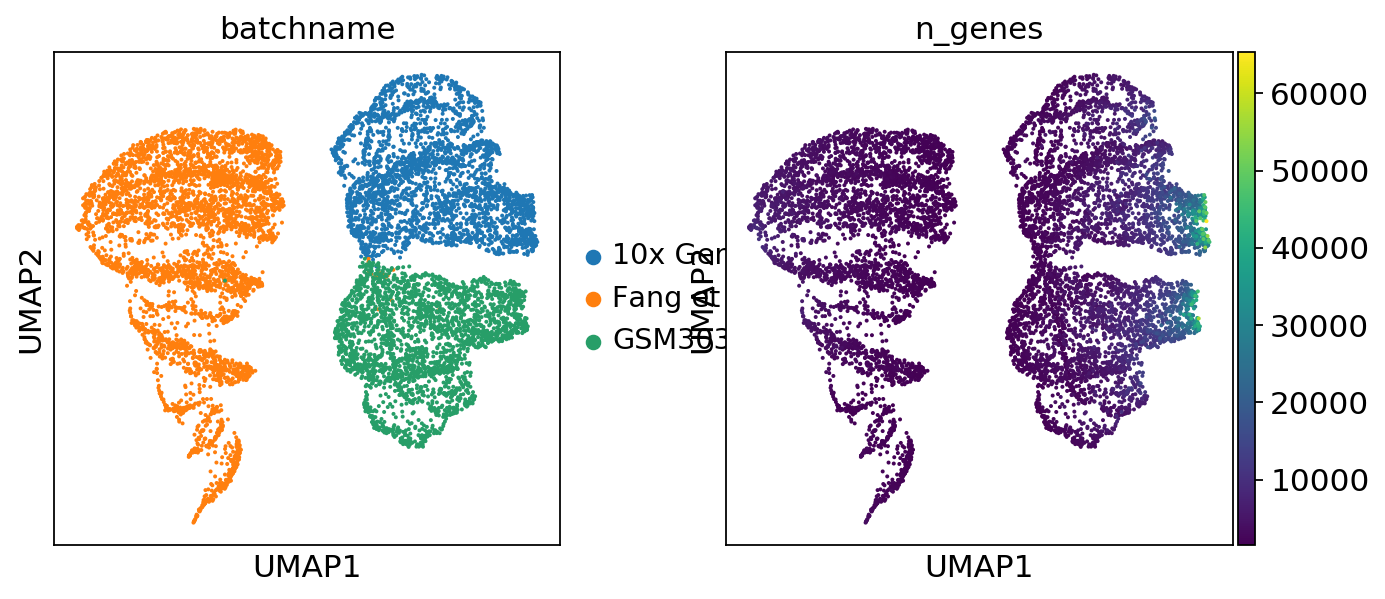

In [48]:
fplot="_brain_atac_3datasets_filterRowCol.pdf"
sc.pl.pca(adata_merge_all, color=['batchname','n_genes'], save=fplot)
sc.pl.tsne(adata_merge_all, color=['batchname','n_genes'], save=fplot)
sc.pl.umap(adata_merge_all, color=['batchname','n_genes'], save=fplot)

In [94]:
#sc.pp.filter_cells(adata3sets, min_counts=1000)

In [49]:
adata_merge_all.obs['n_genes']

index
AGCGATAGACTATTCATTATTGACCGAGTATAGCCT-0-0     3878
AGCGATAGACTATTCATTCGCCTCTTATCCTATCCT-0-0    15812
AGCGATAGACTATTCATTCTTAGGTATCGTACTGAC-0-0     7834
AGCGATAGACTATTCATTGCGATTGCAGAGGCGAAG-0-0     5323
AGCGATAGACTATTCATTGTCTGCAATCTAATCTTA-0-0     8878
                                            ...  
TCTCGCGCTTCGAATATTGTCTGCAATCGTACTGAC-1       2080
TCTCGCGCTTGCTTAGATGAGACCTACCTATAGCCT-1       1561
TCTCGCGCTTGCTTAGATGTCTGCAATCCCTATCCT-1       6102
TCTCGCGCTTGCTTAGATGTCTGCAATCTATAGCCT-1       4447
TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC-1       3726
Name: n_genes, Length: 9300, dtype: int64

In [50]:
#adata3sets2 = adata3sets[:,adata3sets.var['n_cells']>500]

In [51]:
#adata3sets2

In [52]:
#sc.pp.pca(adata3sets2)
#sc.pp.neighbors(adata3sets2)

In [53]:
#sc.tl.tsne(adata3sets2)
#sc.tl.umap(adata3sets2)

In [55]:
#fplot="_brain_atac_3datasets_filterRowCol_filterCountCell.pdf"
#sc.pl.pca(adata3sets2, color=['batchname', 'n_genes', 'n_counts'],save=fplot)
#sc.pl.tsne(adata3sets2, color=['batchname', 'n_genes', 'n_counts'],save=fplot)
#sc.pl.umap(adata3sets2, color=['batchname', 'n_genes', 'n_counts'],save=fplot)

In [57]:
adata_merge_all.obs['counts'] = adata_merge_all.obs['n_genes'] 

In [58]:
adata_merge_all

AnnData object with n_obs × n_vars = 9300 × 125449 
    obs: 'batch', 'batchname', 'n_genes', 'counts'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1', 'n_cells'
    uns: 'pca', 'neighbors', 'batchname_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [59]:
# uncomment this line to save the file
adata_merge_all.write(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol.h5ad")

# Regression

In [60]:
# read the intermediate files 
#adata_merge_all = sc.read(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol.h5ad")
#adata_merge_all

In [62]:
# let's regress the cells based on n_counts
# the data is already binary
np.max(adata_merge_all.X)

1.0

In [63]:
#epi.pp.binarize(adata_merge_all)
#np.max(adata_merge_all.X)

In [64]:
#adata_merge_all

In [65]:
sc.pp.regress_out(adata_merge_all, 'n_genes')

In [66]:
sc.pp.pca(adata_merge_all)
sc.pp.neighbors(adata_merge_all)

The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../../home/icb/chaichoompu/.local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^



In [67]:
sc.tl.tsne(adata_merge_all)
sc.tl.umap(adata_merge_all)

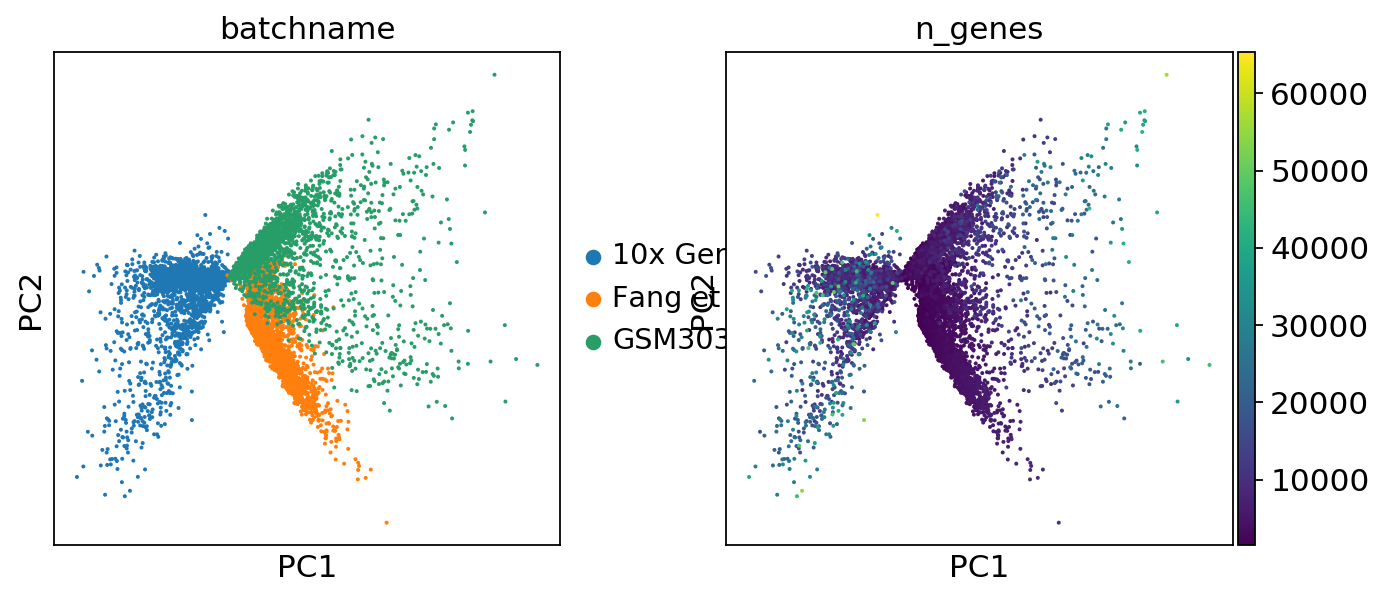

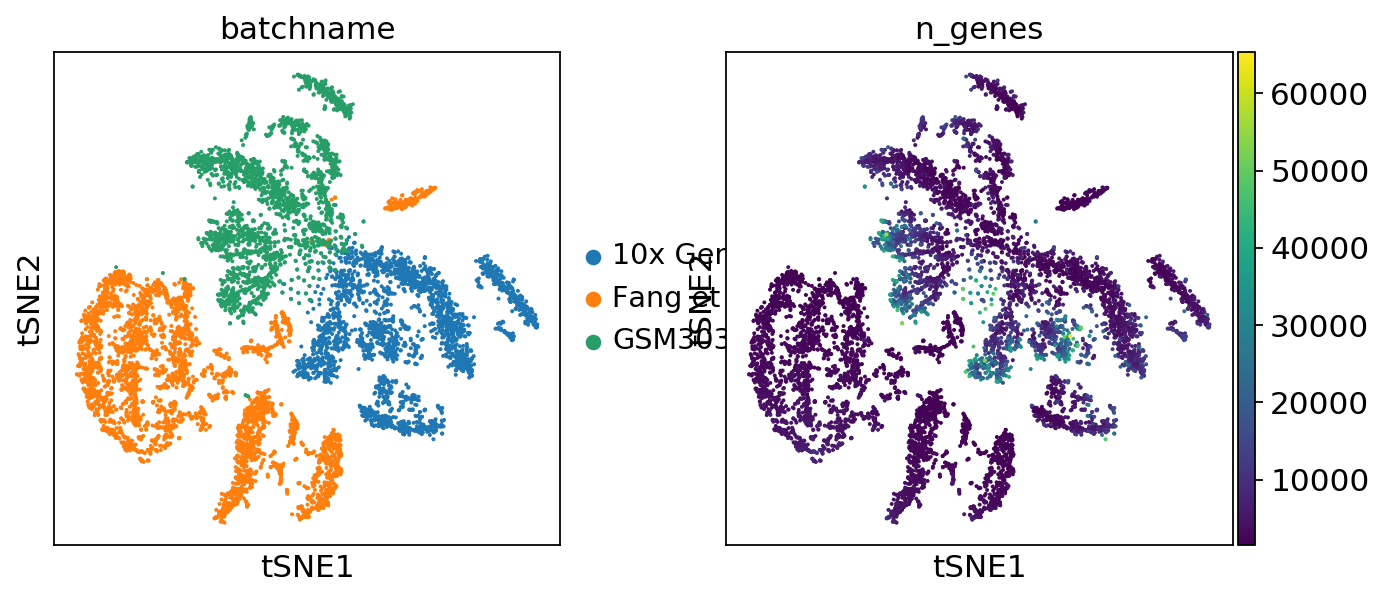

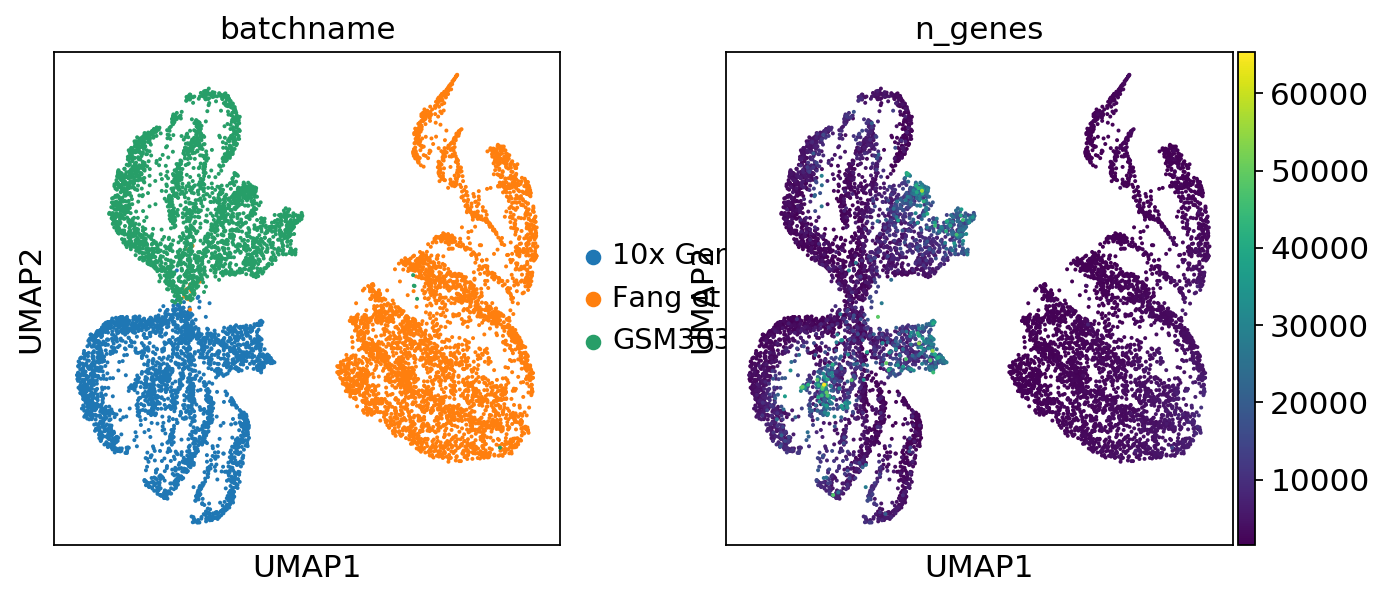

In [68]:
fplot="_brain_atac_3datasets_filterRowCol_regression.pdf"
sc.pl.pca(adata_merge_all, color=['batchname', 'n_genes'],save=fplot)
sc.pl.tsne(adata_merge_all, color=['batchname', 'n_genes'],save=fplot)
sc.pl.umap(adata_merge_all, color=['batchname', 'n_genes'],save=fplot)


In [30]:
# uncomment this line to save the file
#adata_merge_all.write(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol_regression.h5ad")

In [4]:
# read the intermediate files 
adata_merge_all = sc.read(DATADIR+"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol_regression.h5ad")

In [71]:
adata_merge_all.X = scipy.sparse.csr_matrix(adata_merge_all.X)

In [8]:
# uncomment this line to save the file
adata_merge_all.write(DATADIR +"/merge_10x_CEMBA180312_3B_GSM3034638_bin_merged_filterRowCol_regression_Seurat.h5ad")

# Test during hackathon 11.09.2019

In [9]:
adata_merge_all

AnnData object with n_obs × n_vars = 21702 × 152639 
    obs: 'batch', 'batchname'
    var: 'keep-0-0', 'n_cells-0-0', 'overlap_3datasets', 'first_filtering-1', 'second_filtering-1', 'n_cells-1'

In [22]:
adata_merge_all.obs['batchname'].value_counts()

Fang et al. 2019    14930
GSM3034638           3386
10x Genomics         3386
Name: batchname, dtype: int64

In [11]:
adata_merge_all.X

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
print(np.max(adata_merge_all.X))
print(np.min(adata_merge_all.X))

1.0
0.0


In [6]:
adata_merge_all.X


array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
np.mean(adata_merge_all.X)

0.019086646